In [1]:
#This are the most common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

# Dataset basic walkthrough

In [2]:
df = pd.read_csv('hmofaltasadministrativas.csv', encoding="latin1")

Make all letters uppercase

In [3]:
df = df.applymap(lambda s:s.upper() if type(s) == str else s)

The dataset is from 01/01/2015 through 05/07/2018
We will delete the data from 2018

In [4]:
#Obtenemos dia, mes y año de la columna de fecha_presentación del dataframe
df['AÑO'] = pd.DatetimeIndex(df['fecha_presentacion']).year
df['MES'] = pd.DatetimeIndex(df['fecha_presentacion']).month
df['DIA'] = pd.DatetimeIndex(df['fecha_presentacion']).day
df['HORA'] = pd.DatetimeIndex(df['fecha_presentacion']).hour
df['MINUTE'] = pd.DatetimeIndex(df['fecha_presentacion']).minute
df.drop('fecha_presentacion', axis= 1, inplace = True)
df.tail()

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,colonia_detenido,AÑO,MES,DIA,HORA,MINUTE
122187,COMANDANCIA CENTRO,5 DE MAYO,DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRI...,1995,1.68,60.0,M,5 DE MAYO,2018,5,7,7,26
122188,COMANDANCIA CENTRO,MODELO (PTE),DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRI...,1998,1.50,50.0,M,FLOTANTE,2018,5,7,8,44
122189,COMANDANCIA CENTRO,CAFE COMBATE,NEGARSE A CUMPLIR UNA INDICACION JUSTIFICADA H...,1987,1.70,67.0,M,FUERA DEL MUNICIPIO,2018,5,7,9,6
122190,COMANDANCIA CENTRO,PITIC,DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRI...,1992,1.74,74.0,M,FUERA DEL MUNICIPIO,2018,5,7,10,50
122191,COMANDANCIA NORTE,LA CAMPIÑA FRACC,DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRI...,1983,1.75,70.0,M,ADOLFO DE LA HUERTA,2018,5,7,12,46


In [5]:
df = df[df['AÑO'] < 2018]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99895 entries, 0 to 99894
Data columns (total 13 columns):
zona                99895 non-null object
colonia_delito      99895 non-null object
motivo_remision     99895 non-null object
nacimiento          99895 non-null int64
estatura            99864 non-null float64
peso                99863 non-null float64
sexo                99895 non-null object
colonia_detenido    99895 non-null object
AÑO                 99895 non-null int64
MES                 99895 non-null int64
DIA                 99895 non-null int64
HORA                99895 non-null int64
MINUTE              99895 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 10.7+ MB


# Top 10 Colonias con mas delitos

In [7]:
colonias_delitos = df['colonia_delito'].value_counts()
colonias_delitos_top10 = df['colonia_delito'].value_counts()[0:10]
colonias_delitos_plt = colonias_delitos.plot(kind='barh')
plt.close()

In [8]:
df_colonias_delitos_top10 = pd.DataFrame(colonias_delitos_top10)
df_colonias_delitos_top10

,colonia_delito
CENTRO (N),8226
PUEBLITOS,3879
SOLIDARIDAD I,3032
LA CHOYA FRACC,2652
INSURGENTES,2106
REAL DEL CARMEN,1898
VILLA VERDE,1844
MIGUEL HIDALGO (N),1796
VILLA DEL REAL FRACC.,1685
SAHUARO AMPLIACION,1624


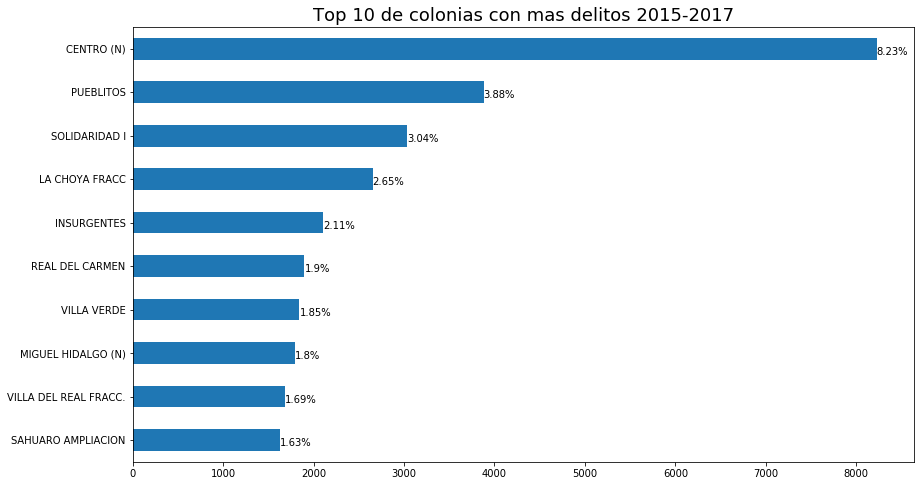

In [9]:
colonias_delitos_top10_plt = colonias_delitos_top10.plot(kind='barh',figsize = (14,8))
colonias_delitos_top10_plt.set_alpha(0.8)
colonias_delitos_top10_plt.set_title("Top 10 de colonias con mas delitos 2015-2017", fontsize=18)
# create a list to collect the data
totals = []
# find the values and append to list
for i in colonias_delitos_plt.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in colonias_delitos_top10_plt.patches:
    # get_width pulls left or right; get_y pushes up or down
    colonias_delitos_top10_plt.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='black')
#Invert the direction of the plot
colonias_delitos_top10_plt.invert_yaxis()

Since colonia Centro (N) has de highest percentage of crimes we will focus on that one.

# Colonia Centro (N)

## Dataset

In [10]:
df_colonia_centro = df[df['colonia_delito'] == 'CENTRO (N)']
df_colonia_centro.head(2)

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,colonia_detenido,AÑO,MES,DIA,HORA,MINUTE
23,COMANDANCIA CENTRO,CENTRO (N),CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1989,1.73,100.0,M,BUGAMBILIAS,2015,1,1,7,13
30,COMANDANCIA CENTRO,CENTRO (N),PERNOCTAR EN LA VIA PUBLICA A CONSECUENCIA DE ...,1981,1.65,60.0,M,FLOTANTE,2015,1,1,10,45


## Top 10 Motivos de remisión en colonia Centro (N)

In [11]:
colonia_centro = df_colonia_centro['motivo_remision'].value_counts()
colonia_centro_top10 = colonia_centro[0:10]
colonia_centro_plt = colonia_centro.plot(kind='barh')
plt.close()

In [12]:
df_colonia_centro_top10 = pd.DataFrame(colonia_centro_top10)
df_colonia_centro_top10

,motivo_remision
CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICOS O PRIVADOS,2451
DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRIAGUEZ O DROGADO,1953
INGERIR BEBIDAS ALCOHOLICAS A BORDO DE UN VEHICULO O EN VIA PUBLICA,823
PERNOCTAR EN LA VIA PUBLICA A CONSECUENCIA DE INGESTA DE ALCOHOL O CONSUMO DE DROGAS .,578
ESPIAR EN EL INTERIOR DE PATIOS Y CASAS FALTANDO A LA PRIVACIDAD DE LAS PERSONAS,512
CONDUCIR EDO.EBRIEDAD INFLUJO DROGAS O SUSTANCIAS TOXICAS AFECTADO DE SUS FACULTADES PSICOMOTRICES,484
NEGARSE A CUMPLIR UNA INDICACION JUSTIFICADA HECHA POR UN POLICIA EN FUNCION,336
POR INHALAR THINER RESISTOL PINTURA O CUALQUIER OTRA SUSTANCIA QUE ALTERE LA CONDUCTA EN PUBLICO.,300
PROVOCAR O PARTICIPAR EN RIÑAS EN LA VIA PUBLICA,227
DEFECAR U ORINAR EN LA VIA PUBLICA,156


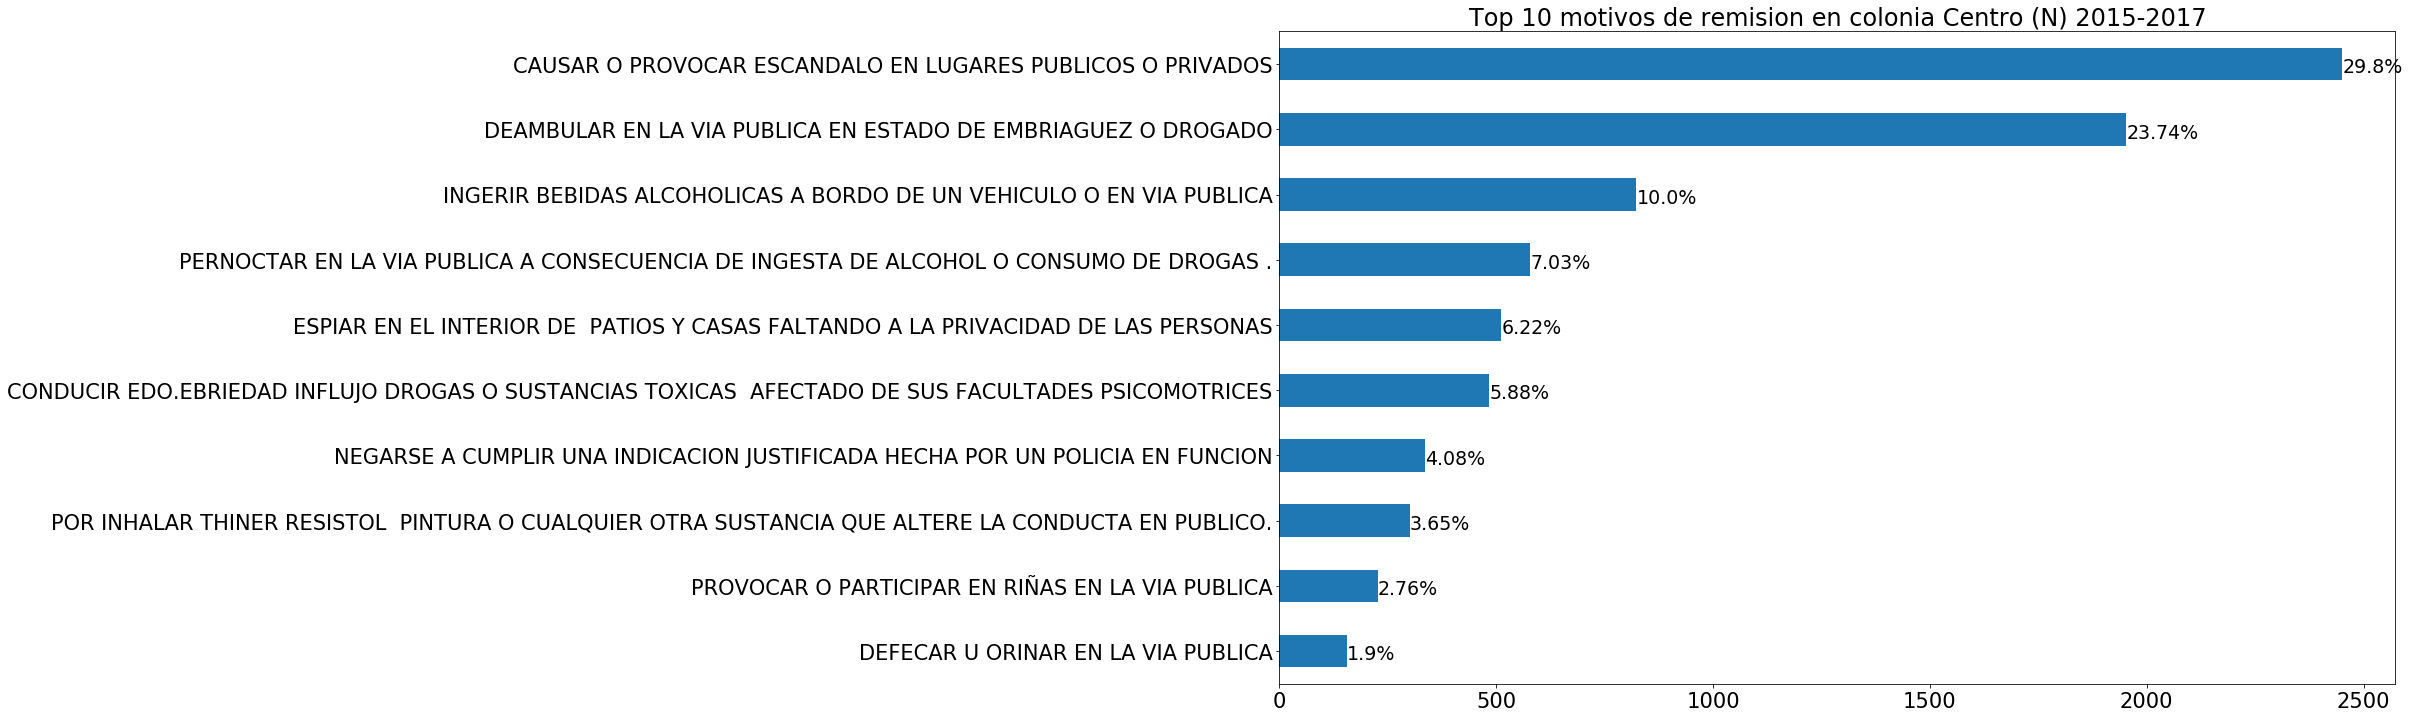

In [13]:
colonia_centro_top10_plt = colonia_centro_top10.plot(kind='barh',figsize = (20,12))
colonia_centro_top10_plt.set_alpha(0.8)
colonia_centro_top10_plt.set_title("Top 10 motivos de remision en colonia Centro (N) 2015-2017", 
                                   fontsize=24)
colonia_centro_top10_plt.tick_params(labelsize=21)
# create a list to collect the data
totals = []
# find the values and append to list
for i in colonia_centro_plt.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in colonia_centro_top10_plt.patches:
    # get_width pulls left or right; get_y pushes up or down
    colonia_centro_top10_plt.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=19,
color='black')
#Invert the direction of the plot
colonia_centro_top10_plt.invert_yaxis()

## Cuando se dieron los delitos de "Causar o provocar escandalo en lugares públicos o privados en la colonia Centro (N)

In [14]:
df_colonia_centro.head(2)

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,colonia_detenido,AÑO,MES,DIA,HORA,MINUTE
23,COMANDANCIA CENTRO,CENTRO (N),CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1989,1.73,100.0,M,BUGAMBILIAS,2015,1,1,7,13
30,COMANDANCIA CENTRO,CENTRO (N),PERNOCTAR EN LA VIA PUBLICA A CONSECUENCIA DE ...,1981,1.65,60.0,M,FLOTANTE,2015,1,1,10,45


[Text(0, 0, 'Enero'),
 Text(0, 0, 'Febrero'),
 Text(0, 0, 'Marzo'),
 Text(0, 0, 'Abril'),
 Text(0, 0, 'Mayo'),
 Text(0, 0, 'Junio'),
 Text(0, 0, 'Julio'),
 Text(0, 0, 'Agosto'),
 Text(0, 0, 'Septiembre'),
 Text(0, 0, 'Octubre'),
 Text(0, 0, 'Noviembre'),
 Text(0, 0, 'Diciembre')]

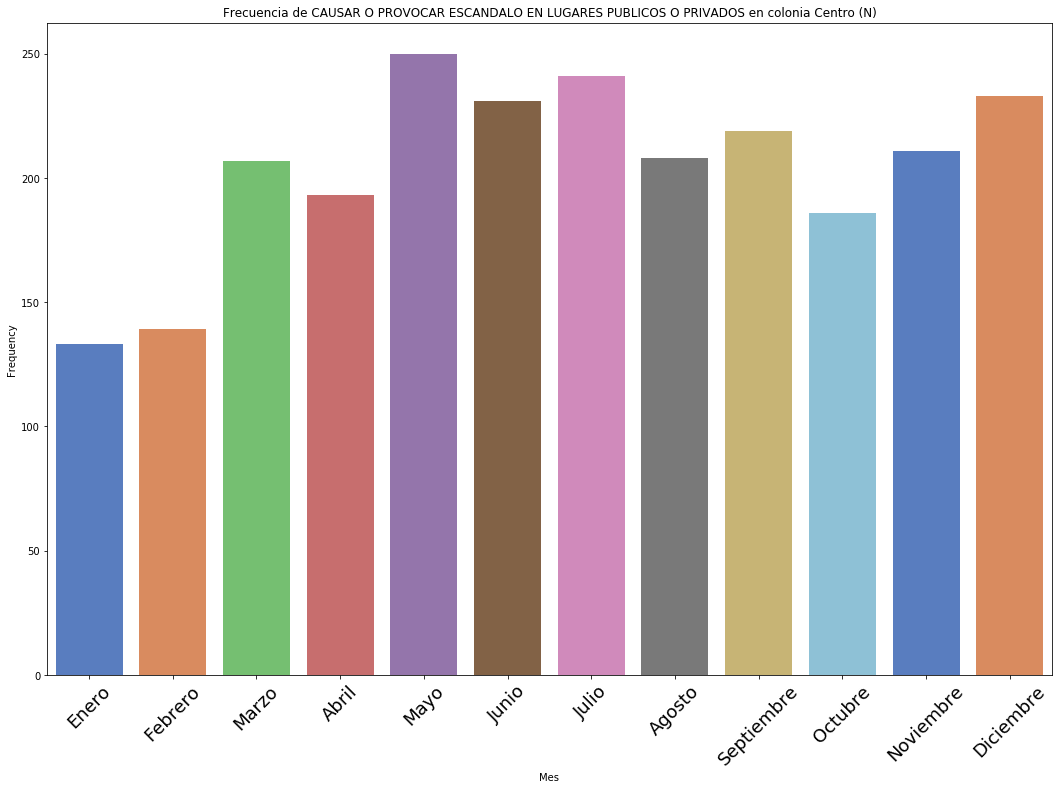

In [16]:
df_escandalo_colcentro = df_colonia_centro[df_colonia_centro['motivo_remision'] == 
                                           'CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICOS O PRIVADOS']
plt.figure(figsize=(18,12))
escandalo_colcentro_plt = sns.countplot(x='MES',data=df_escandalo_colcentro, palette="muted")
plt.title('Frecuencia de CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICOS O PRIVADOS en colonia Centro (N)')
plt.xlabel('Mes')
plt.ylabel('Frequency')

labels = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", 'Junio', 'Julio', 'Agosto', 'Septiembre',
          "Octubre", 'Noviembre', 'Diciembre']
escandalo_colcentro_plt.set_xticklabels(labels, rotation = 45 , fontsize=18)

### Porcentaje de reincidencias del delito CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICOS O PRIVADOS en colonia CENTRO (N)

In [17]:
df_escandalo_colcentro_reincidencias = df_escandalo_colcentro.drop_duplicates(subset= 
                                                                              ['colonia_detenido','nacimiento', 
                                                                               'estatura', 'peso','sexo'],
                                  keep = 'last')

In [18]:
(1-(len(df_escandalo_colcentro_reincidencias)/len(df_escandalo_colcentro)))*100

22.88861689106487

[Text(0, 0, 'Enero'),
 Text(0, 0, 'Febrero'),
 Text(0, 0, 'Marzo'),
 Text(0, 0, 'Abril'),
 Text(0, 0, 'Mayo'),
 Text(0, 0, 'Junio'),
 Text(0, 0, 'Julio'),
 Text(0, 0, 'Agosto'),
 Text(0, 0, 'Septiembre'),
 Text(0, 0, 'Octubre'),
 Text(0, 0, 'Noviembre'),
 Text(0, 0, 'Diciembre')]

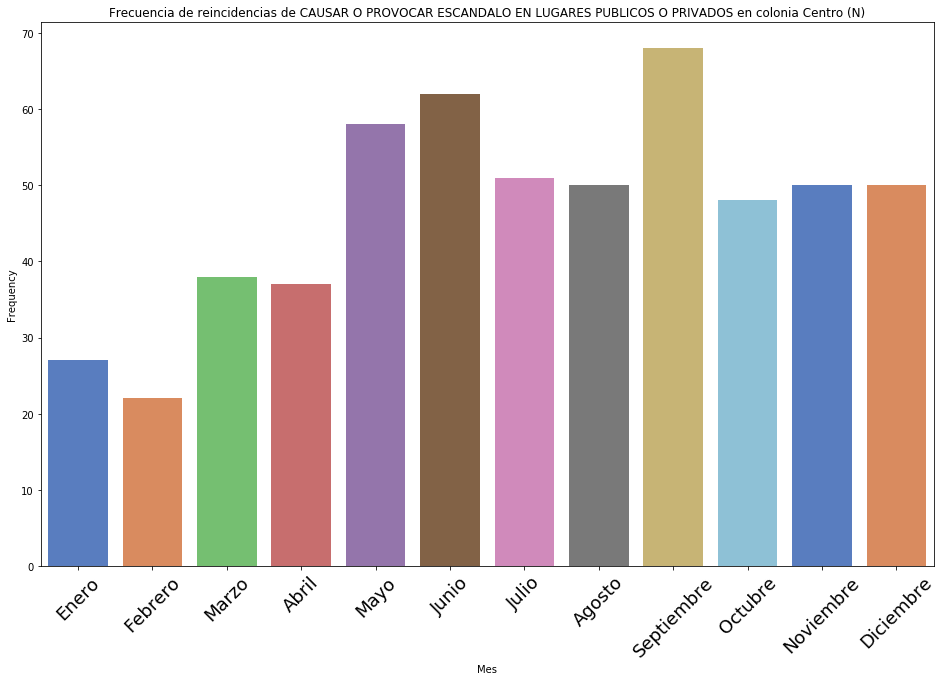

In [20]:
df_escandalo_colcentro_reincidencias = df_escandalo_colcentro[df_escandalo_colcentro.duplicated(['colonia_detenido', 
                                                                    'nacimiento', 'estatura', 'peso',
                                                                    'sexo']) == True]
plt.figure(figsize=(16,10))
df_escandalo_colcentro_reincidencias_plt = sns.countplot(x='MES',data=df_escandalo_colcentro_reincidencias, palette="muted")
plt.title('Frecuencia de reincidencias de CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICOS O PRIVADOS en colonia Centro (N)')
plt.xlabel('Mes')
plt.ylabel('Frequency')

labels = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", 'Junio', 'Julio', 'Agosto', 'Septiembre',
          "Octubre", 'Noviembre', 'Diciembre']
df_escandalo_colcentro_reincidencias_plt.set_xticklabels(labels, rotation = 45 , fontsize=18)

## 

In [21]:
colonia_centro_colonia_detenido = df_escandalo_colcentro['colonia_detenido'].value_counts()
colonia_centro_colonia_detenido_top10 = colonia_centro_colonia_detenido[0:10]
colonia_centro_colonia_detenido_plt = colonia_centro.plot(kind='barh')
plt.close()

In [22]:
colonia_centro_colonia_detenido_top10 = pd.DataFrame(colonia_centro_colonia_detenido_top10)
colonia_centro_colonia_detenido_top10

,colonia_detenido
FLOTANTE,1022
FUERA DEL MUNICIPIO,224
CENTRO (N),125
ADOLFO DE LA HUERTA,60
MARIACHI,46
5 DE MAYO,38
PUEBLITOS,28
NUEVO HERMOSILLO,26
SAN LUIS,26
OLIVARES (OTE),25


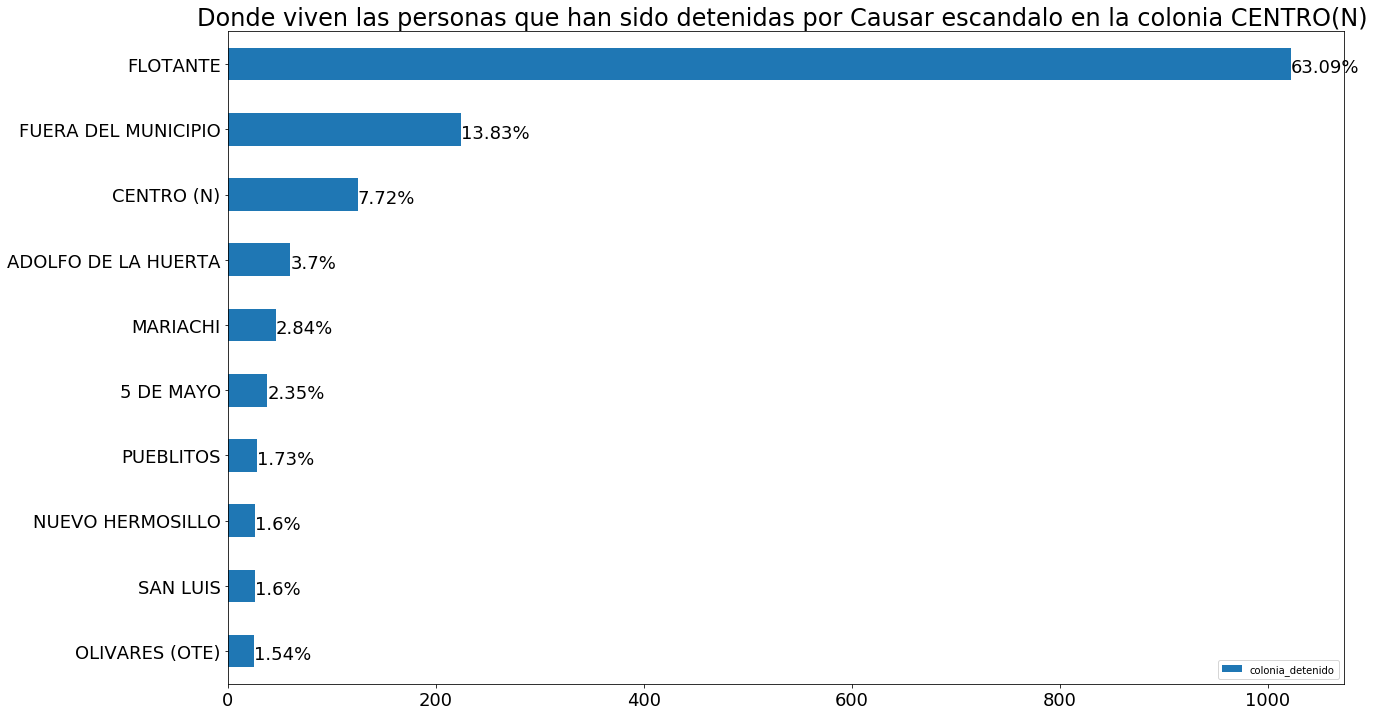

In [23]:
colonia_centro_colonia_detenido_top10_plt = colonia_centro_colonia_detenido_top10.plot(kind='barh',figsize = (20,12))
colonia_centro_colonia_detenido_top10_plt.set_alpha(0.8)
colonia_centro_colonia_detenido_top10_plt.set_title("Donde viven las personas que han sido detenidas por Causar escandalo en la colonia CENTRO(N) ", 
                                   fontsize=24)
colonia_centro_colonia_detenido_top10_plt.tick_params(labelsize=18)
# create a list to collect the data
totals = []
# find the values and append to list
for i in colonia_centro_colonia_detenido_top10_plt.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in colonia_centro_colonia_detenido_top10_plt.patches:
    # get_width pulls left or right; get_y pushes up or down
    colonia_centro_colonia_detenido_top10_plt.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=18,
color='black')
#Invert the direction of the plot
colonia_centro_colonia_detenido_top10_plt.invert_yaxis()

## Top 10 Motivos de remision 

In [24]:
motivo_remision = df['motivo_remision'].value_counts()
motivo_remision_top10 = df['motivo_remision'].value_counts()[0:10]
motivo_remision_plt = motivo_remision.plot(kind='barh')
plt.close()

In [25]:
df_motivo_remision_top10 = pd.DataFrame(motivo_remision_top10)
df_motivo_remision_top10

,motivo_remision
DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRIAGUEZ O DROGADO,32926
CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICOS O PRIVADOS,21761
ESPIAR EN EL INTERIOR DE PATIOS Y CASAS FALTANDO A LA PRIVACIDAD DE LAS PERSONAS,20720
CONDUCIR EDO.EBRIEDAD INFLUJO DROGAS O SUSTANCIAS TOXICAS AFECTADO DE SUS FACULTADES PSICOMOTRICES,6432
INGERIR BEBIDAS ALCOHOLICAS A BORDO DE UN VEHICULO O EN VIA PUBLICA,3832
POR INHALAR THINER RESISTOL PINTURA O CUALQUIER OTRA SUSTANCIA QUE ALTERE LA CONDUCTA EN PUBLICO.,3374
NEGARSE A CUMPLIR UNA INDICACION JUSTIFICADA HECHA POR UN POLICIA EN FUNCION,3051
PROVOCAR O PARTICIPAR EN RIÑAS EN LA VIA PUBLICA,2914
PERNOCTAR EN LA VIA PUBLICA A CONSECUENCIA DE INGESTA DE ALCOHOL O CONSUMO DE DROGAS .,1694
DEFECAR U ORINAR EN LA VIA PUBLICA,740


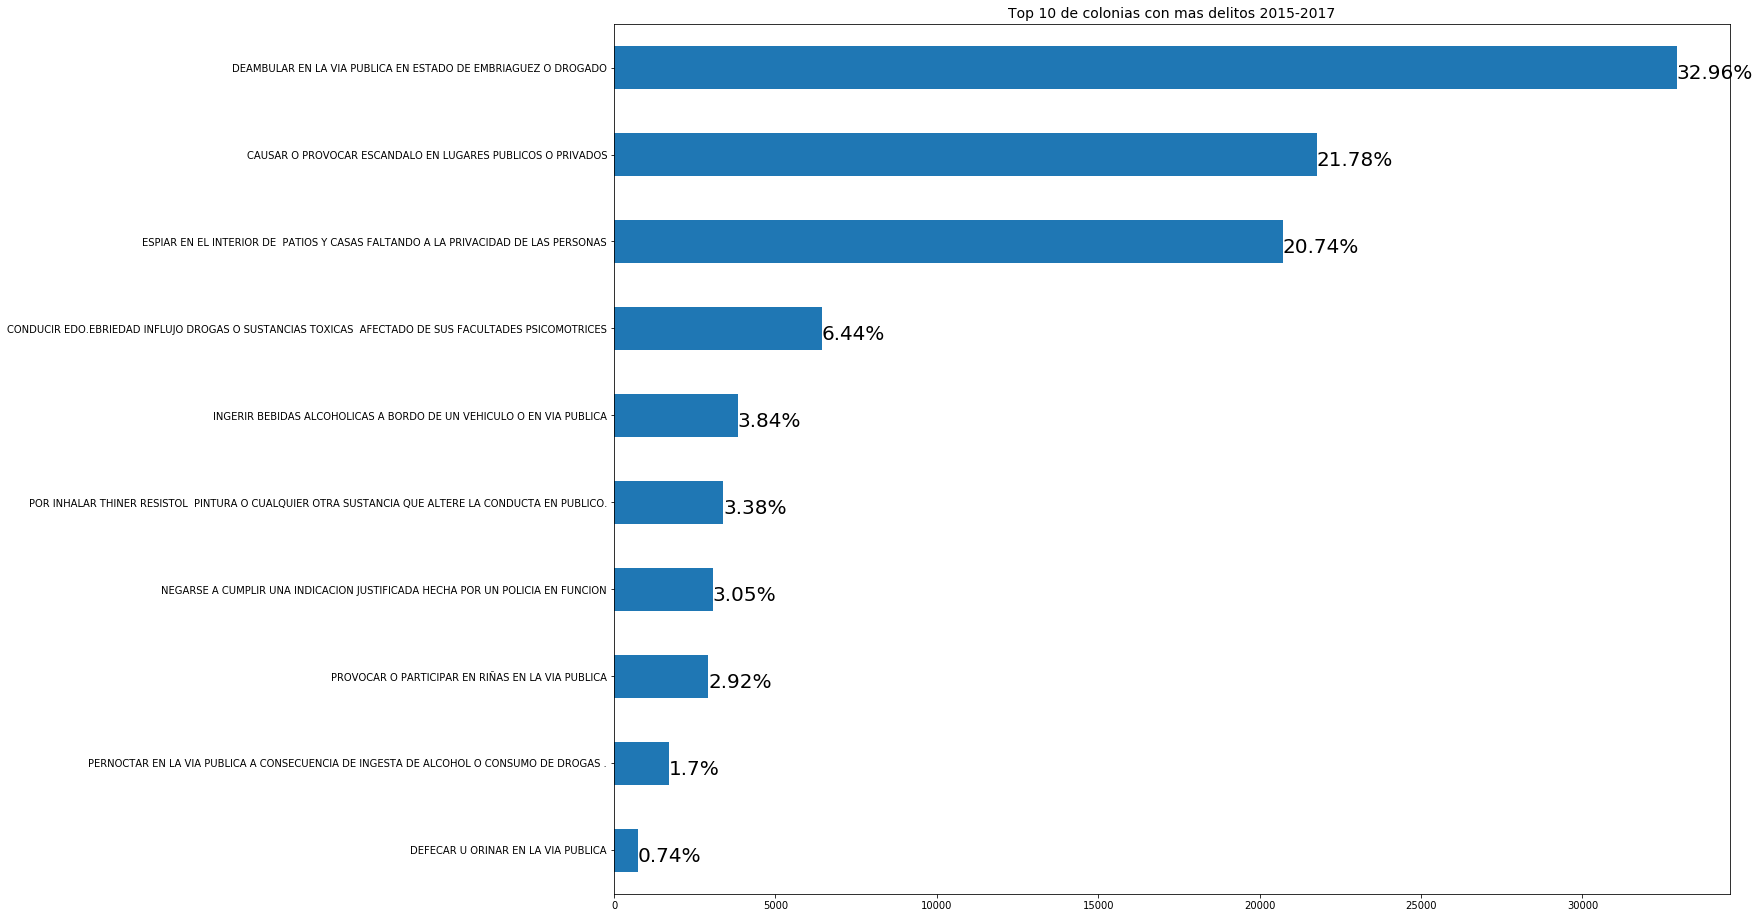

In [26]:
motivo_remision_top10_plt = motivo_remision_top10.plot(kind='barh',figsize = (20,16))
motivo_remision_top10_plt.set_alpha(0.8)
motivo_remision_top10_plt.set_title("Top 10 de colonias con mas delitos 2015-2017", fontsize=14)
# create a list to collect the data
totals = []
# find the values and append to list
for i in motivo_remision_plt.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in motivo_remision_top10_plt.patches:
    # get_width pulls left or right; get_y pushes up or down
    motivo_remision_top10_plt.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=20,
color='black')
#Invert the direction of the plot
motivo_remision_top10_plt.invert_yaxis()

[Text(0, 0, 'Enero'),
 Text(0, 0, 'Febrero'),
 Text(0, 0, 'Marzo'),
 Text(0, 0, 'Abril'),
 Text(0, 0, 'Mayo'),
 Text(0, 0, 'Junio'),
 Text(0, 0, 'Julio'),
 Text(0, 0, 'Agosto'),
 Text(0, 0, 'Septiembre'),
 Text(0, 0, 'Octubre'),
 Text(0, 0, 'Noviembre'),
 Text(0, 0, 'Diciembre')]

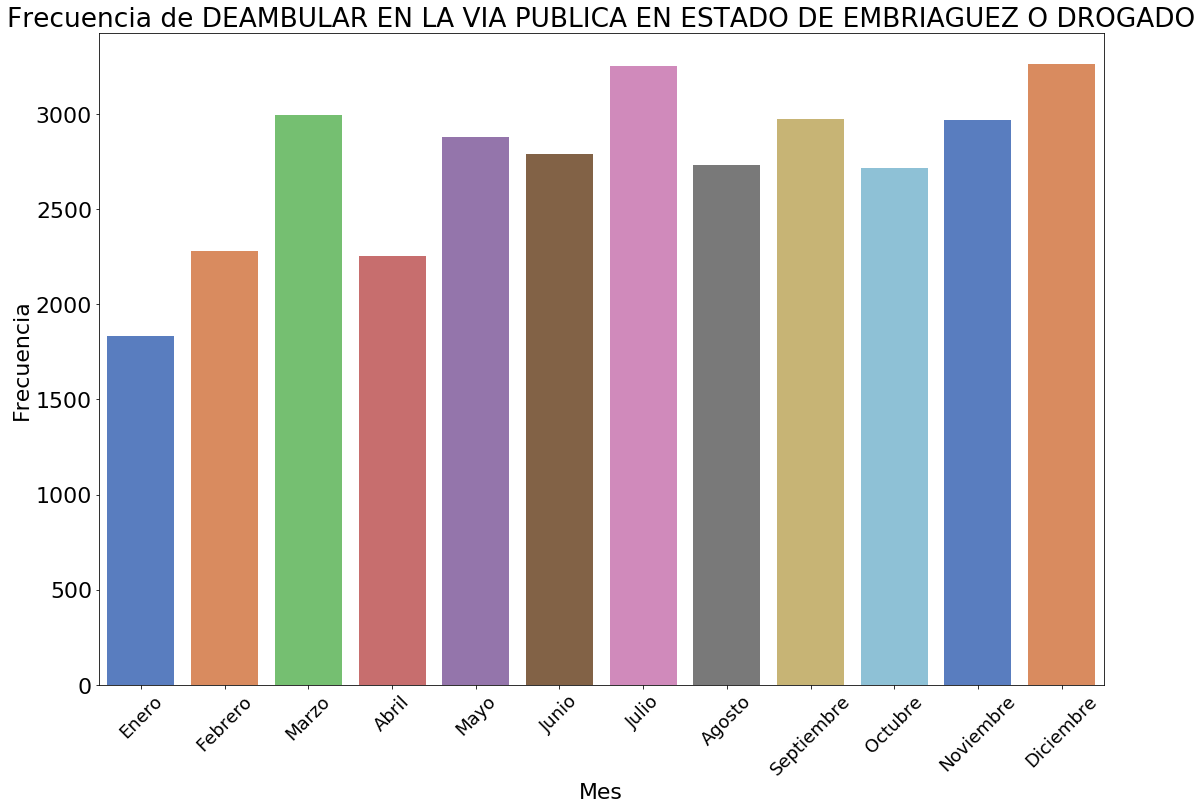

In [228]:
df_motivo_remision_mes = df[df['motivo_remision'] == 
                                           'DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRIAGUEZ O DROGADO']
plt.figure(figsize=(18,12))
motivo_remision_mes_plt = sns.countplot(x='MES',data=df_motivo_remision_mes, palette="muted")
plt.title('Frecuencia de DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRIAGUEZ O DROGADO')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

labels = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", 'Junio', 'Julio', 'Agosto', 'Septiembre',
          "Octubre", 'Noviembre', 'Diciembre']
motivo_remision_mes_plt.set_xticklabels(labels, rotation = 45 , fontsize=18)


#for item in motivo_remision_mes_plt.patches:
#    height = item.get_height()
#    df_motivo_remision_mes.text(item.get_x()+item.get_width()/2.,
#            height + 3,
#            '{:1.2f}'.format(height/total*100)+'%',
#            ha="center")

# Predictions

In [211]:
df_colonia_centro.head(2)

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,colonia_detenido,AÑO,MES,DIA,HORA,MINUTE
23,COMANDANCIA CENTRO,CENTRO (N),CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1989,1.73,100.0,M,BUGAMBILIAS,2015,1,1,7,13
30,COMANDANCIA CENTRO,CENTRO (N),PERNOCTAR EN LA VIA PUBLICA A CONSECUENCIA DE ...,1981,1.65,60.0,M,FLOTANTE,2015,1,1,10,45


In [258]:
new_df = df_colonia_centro.copy()
#new_df['motivo_remision'] = pd.factorize(new_df['motivo_remision'], sort=True)[0] + 1
new_df['zona'] = pd.factorize(new_df['zona'], sort=True)[0] + 1
new_df['colonia_delito'] = pd.factorize(new_df['colonia_delito'], sort=True)[0] + 1
new_df['sexo'] = pd.factorize(new_df['sexo'], sort=True)[0] + 1
new_df['zona'] = pd.factorize(new_df['zona'], sort=True)[0] + 1
new_df['motivo_remision'] = pd.factorize(new_df['motivo_remision'], sort=True)[0] + 1
new_df['colonia_detenido'] = pd.factorize(new_df['colonia_detenido'], sort=True)[0] + 1
new_df.head()

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,colonia_detenido,AÑO,MES,DIA,HORA,MINUTE
23,3,1,5,1989,1.73,100.0,2,34,2015,1,1,7,13
30,3,1,23,1981,1.65,60.0,2,86,2015,1,1,10,45
39,3,1,7,1975,1.72,75.0,2,167,2015,1,1,14,34
52,3,1,31,1973,1.75,90.0,2,212,2015,1,1,17,56
74,3,1,5,1991,1.77,70.0,2,278,2015,2,1,5,19


In [259]:
new_df['Reincidencia'] = new_df.duplicated(subset= ['colonia_detenido', 'motivo_remision', 'nacimiento', 'estatura', 'peso', 'sexo'])
new_df.head()

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,colonia_detenido,AÑO,MES,DIA,HORA,MINUTE,Reincidencia
23,3,1,5,1989,1.73,100.0,2,34,2015,1,1,7,13,False
30,3,1,23,1981,1.65,60.0,2,86,2015,1,1,10,45,False
39,3,1,7,1975,1.72,75.0,2,167,2015,1,1,14,34,False
52,3,1,31,1973,1.75,90.0,2,212,2015,1,1,17,56,False
74,3,1,5,1991,1.77,70.0,2,278,2015,2,1,5,19,False


In [260]:
new_df['Reincidencia'].sum()

1343

In [261]:
new_df.dropna(inplace= True)

In [262]:
#This is for splitting the train data vs the test data
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

# This is for Logistic Regression
from sklearn.linear_model import LogisticRegression

#This is a import for classification_report, it will show the accuracy of the training model
from sklearn.metrics import classification_report, confusion_matrix

#This is a import for Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Steps to predict 
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

In [263]:
X = new_df.drop('Reincidencia', 
                 axis = 1)
y = new_df['Reincidencia']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

In [264]:
# Escalar los datos
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

##  Random Forest

In [265]:
rfc = RandomForestClassifier(n_estimators = 10,criterion = 'gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [266]:
prediction = rfc.predict(X_test)

In [267]:
#prediction = rfc.predict(X_test)
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[1989   74]
 [ 335   67]]


              precision    recall  f1-score   support

       False       0.86      0.96      0.91      2063
        True       0.48      0.17      0.25       402

    accuracy                           0.83      2465
   macro avg       0.67      0.57      0.58      2465
weighted avg       0.79      0.83      0.80      2465



In [268]:
# Create the parameter grid to optimize
param_frst = [
    {
        'criterion': ['gini', 'entropy'],
        'bootstrap': [True, False],
        'n_estimators': [50, 100], 
        'max_depth': [2, 5],
        'max_leaf_nodes': [10, 20]
    }
  ]

In [269]:
# Escoger hiperparametros para modelo Random Forest
from sklearn.model_selection import GridSearchCV
#param_frst = [{"n_estimators": [100,500,750,1000], "criterion": ["gini", "entropy"]}]
grid_search_frst = GridSearchCV(estimator=rfc,
                          param_grid=param_frst,
                          scoring = 'accuracy',
                          cv=3,
                          n_jobs=-1)
grid_search_frst = grid_search_frst.fit(X_train, y_train)

In [270]:
# Calcular accuracy para Random Forest 
best_acc_frst = grid_search_frst.best_score_
best_acc_frst

0.8375934620066076

In [271]:
# Calcular los mejores parametros para el modelo Random Forest
best_params_frst = grid_search_frst.best_params_
best_params_frst

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 10,
 'n_estimators': 50}

In [272]:
rfc = RandomForestClassifier(bootstrap= False,
 criterion= 'gini',
 max_depth= 5,
 max_leaf_nodes = 20,
 n_estimators= 50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [273]:
prediction = rfc.predict(X_test)

In [274]:
#prediction = rfc.predict(X_test)
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[2063    0]
 [ 399    3]]


              precision    recall  f1-score   support

       False       0.84      1.00      0.91      2063
        True       1.00      0.01      0.01       402

    accuracy                           0.84      2465
   macro avg       0.92      0.50      0.46      2465
weighted avg       0.86      0.84      0.77      2465



Text(0.5, 2.05, 'Confusion matrix para Random Forest')

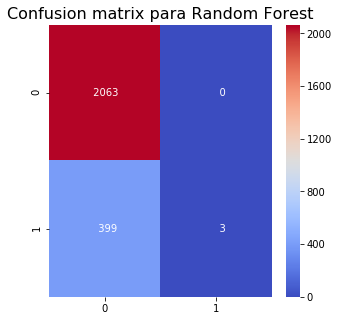

In [275]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
frst_cm = confusion_matrix(y_test, prediction)
fig = plt.figure(figsize = (5,5))
sns.heatmap(frst_cm,annot=True,fmt='5.0f',cmap="coolwarm")
plt.title('Confusion matrix para Random Forest', y=2.05, size=16)

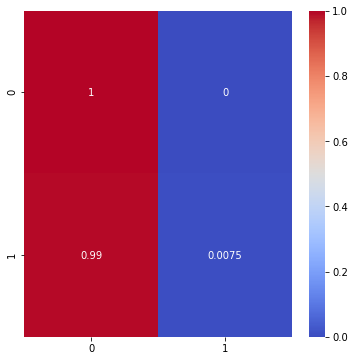

In [276]:
conf_mat = confusion_matrix(y_test, prediction, labels=np.sort(y_test.unique()))
conf_mat_df = pd.DataFrame(
    conf_mat)
conf_mat_props = pd.DataFrame(
    conf_mat_df.values / conf_mat_df.sum(axis=1)[:,None])
fig = plt.figure(figsize = (6,6))

sns.heatmap(conf_mat_props, annot=True, cmap= 'coolwarm');

## Logistic Regression

In [277]:
# iniciar y ajustar el modelo de regresión logistica en el dataset de entrenamiento.

# primero importamos la libreria de Regresion Logistica de SkLearn
from sklearn.linear_model import LogisticRegression
log_rg = LogisticRegression()
log_rg.fit(X_train, y_train)

# Predicción
y_log_rg = log_rg.predict(X_test)



C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.05, 'Confusion matrix para Regresión Logistica')

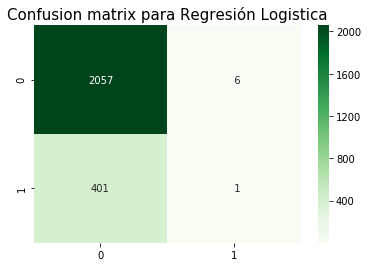

In [278]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_log_rg)
sns.heatmap(cm,annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion matrix para Regresión Logistica', y=1.05, size=15)

In [279]:
# Reporte de Clasificación
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_log_rg)
print(cr)

              precision    recall  f1-score   support

       False       0.84      1.00      0.91      2063
        True       0.14      0.00      0.00       402

    accuracy                           0.83      2465
   macro avg       0.49      0.50      0.46      2465
weighted avg       0.72      0.83      0.76      2465



In [280]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l1'}
accuracy : 0.837245696400626


C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Naive bayes 


In [284]:
# Iniciar y ajustar el modelo de Naive Bayes al dataset de entrenamiento.
from sklearn.naive_bayes import GaussianNB
naive_b = GaussianNB()
naive_b.fit(X_train, y_train)

#Predicción
y_naive = naive_b.predict(X_test)

Text(0.5, 1.05, 'Confusion matrix para Naive Bayes')

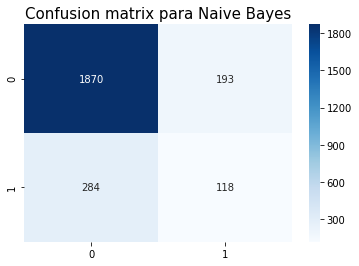

In [285]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
naive_cm = confusion_matrix(y_test, y_naive)
sns.heatmap(naive_cm,annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion matrix para Naive Bayes', y=1.05, size=15)

In [286]:
# Reporte de Clasificación
from sklearn.metrics import classification_report
naive_cr = classification_report(y_test, y_naive)
print(naive_cr)

              precision    recall  f1-score   support

       False       0.87      0.91      0.89      2063
        True       0.38      0.29      0.33       402

    accuracy                           0.81      2465
   macro avg       0.62      0.60      0.61      2465
weighted avg       0.79      0.81      0.80      2465

